In [1]:
import numpy as np
import scipy
from scipy.spatial import ConvexHull
from scipy.optimize import minimize

In [2]:
import matplotlib.pyplot as plt

In [3]:
def get_n_vec(n = 5):
    return np.array([(np.random.exponential(1), np.random.exponential(1), np.random.normal(0., 1.))for _ in range(n)])

In [4]:
vectors = get_n_vec(10)

In [5]:
def plot_vectors(vectors):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    for vec in vectors:
        ax.plot([0,vec[0]], [0,vec[1]], [0,vec[2]])

In [6]:
def plot_vectors_and_hull(vectors, hull):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    for vec in vectors:
        ax.plot([0,vec[0]], [0,vec[1]], [0,vec[2]])
    for i in hull.simplices:
        plt.plot(vectors[i,0], vectors[i,1], vectors[i,2], 'r-')

In [7]:
def plot_vectors_and_hull_and_alpha(vectors, hull, alpha):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot([0, alpha[0]], [0,alpha[1]], [0,alpha[2]], 'k--', linewidth= 4.5)
    for vec in vectors:
        ax.plot([0,vec[0]], [0,vec[1]], [0,vec[2]])
    for i in hull.simplices:
        plt.plot(vectors[i,0], vectors[i,1], vectors[i,2], 'r-')

In [8]:
def plot_hull_polylist_and_alpha(polylist, alpha):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    mean_pol_l = np.mean([np.linalg.norm(pol) for pol in polylist])
    if np.linalg.norm(alpha) < mean_pol_l:
        alpha_inc = alpha / np.linalg.norm(alpha) * mean_pol_l
        ax.plot([0, alpha_inc[0]], [0,alpha_inc[1]], [0,alpha_inc[2]], 'k--', linewidth= 4.5)
    else:
        ax.plot([0, alpha[0]], [0,alpha[1]], [0,alpha[2]], 'k--', linewidth= 4.5)
    for vec in polylist:
        ax.plot([0,vec[0]], [0,vec[1]], [0,vec[2]])

In [9]:
vectors

array([[ 0.35272709,  0.35106454, -0.59100119],
       [ 1.67555578,  0.43720864, -0.96314107],
       [ 0.19953926,  0.91890211, -1.19016279],
       [ 0.46968422,  0.29169586, -0.59366623],
       [ 1.4452558 ,  0.71719976, -1.42011389],
       [ 0.02480154,  0.04301902,  0.72317365],
       [ 0.93953143,  0.3509958 , -0.27422533],
       [ 3.08108615,  0.85320522, -0.69710994],
       [ 1.15628696,  1.51951031,  0.61566255],
       [ 3.11717986,  0.11906647,  0.4222829 ]])

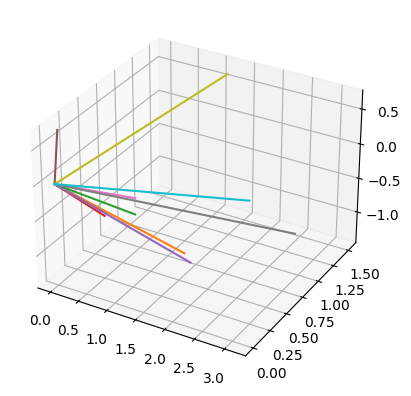

In [10]:
plot_vectors(vectors)

In [11]:
hull = ConvexHull(vectors)

In [12]:
print(hull.simplices)

[[8 9 5]
 [2 8 5]
 [3 9 5]
 [3 2 4]
 [7 8 9]
 [7 2 8]
 [7 2 4]
 [1 3 9]
 [1 3 4]
 [1 7 9]
 [1 7 4]
 [0 2 5]
 [0 3 5]
 [0 3 2]]


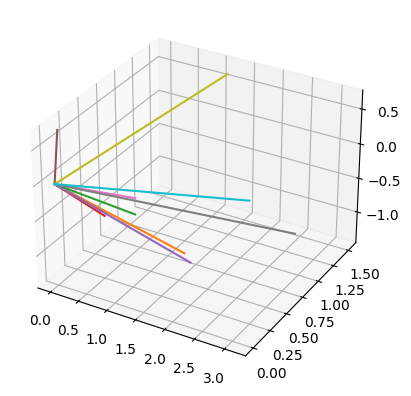

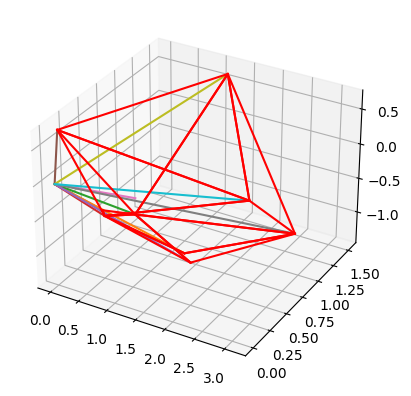

In [13]:
plot_vectors(vectors)
plot_vectors_and_hull(vectors, hull)

In [14]:
def kozinca(XJ, max_step = 100):
    alpha = []
    k = 0
    step = 0
    if len(XJ) < 2:
        return
    if len(alpha) == 0:
        alpha = XJ[0]
    
    min_ind = None
    found = False
    while (found == False) & (step < max_step):
        min_m = alpha @ XJ[0]
        min_ind = 0
        for indx, vect in  enumerate(XJ):
            comp = alpha @ vect
            #print(comp, min_m)
            #print("comparing: ",comp, min_m)
            #print()

            if (type(comp) != np.float64) | (type(min_m) != np.float64):
                print("comp =", comp, "min_m =", min_m, "alpha =", alpha)
            if comp < min_m:
                min_m = comp
                min_ind = indx
        if min_m <= 0:
            w = minimize(lambda k: np.linalg.norm((1 - k) * alpha + k * XJ[min_ind]), 1)
            k = w.x[0]
            alpha = (1 - k) * alpha + k * XJ[min_ind]
        else:
            found = True
        step += 1
        if step % 10000 == 0:
            print(step, np.linalg.norm(alpha), min_m)
    if not found:
        print("ended due to steps")
        print(min_m)

    return alpha, step

In [15]:
polylist = vectors[hull.vertices]

In [16]:
polylist

array([[ 0.35272709,  0.35106454, -0.59100119],
       [ 1.67555578,  0.43720864, -0.96314107],
       [ 0.19953926,  0.91890211, -1.19016279],
       [ 0.46968422,  0.29169586, -0.59366623],
       [ 1.4452558 ,  0.71719976, -1.42011389],
       [ 0.02480154,  0.04301902,  0.72317365],
       [ 3.08108615,  0.85320522, -0.69710994],
       [ 1.15628696,  1.51951031,  0.61566255],
       [ 3.11717986,  0.11906647,  0.4222829 ]])

In [17]:
def do_task(n, max_step = 10000000):
    vectors = get_n_vec(n)
    hull = ConvexHull(vectors)
    polylist = vectors[hull.vertices]
    print("Dots in convex hull:", len(polylist))
    alpha, step = kozinca(polylist, max_step)
    return vectors, hull, polylist, alpha, step

In [18]:
def do_task_and_show(n, max_step = 10000000):
    vectors, hull, polylist, alpha, step = do_task(n, max_step)
    print(step, alpha)
    plot_vectors_and_hull(vectors, hull)
    plot_hull_polylist_and_alpha(polylist, alpha)

Dots in convex hull: 9
2 [0.13564081 0.07534696 0.09192161]


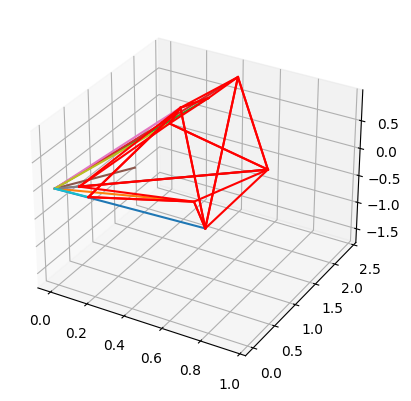

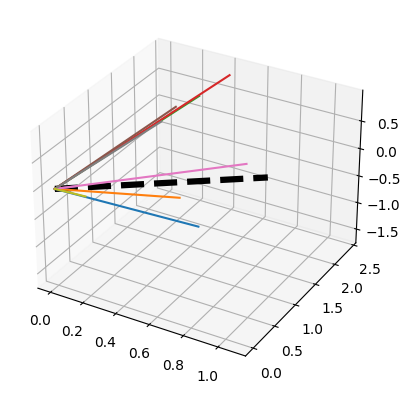

In [19]:
do_task_and_show(10)

Dots in convex hull: 17
5 [ 0.4025678   0.23602117 -0.01252414]


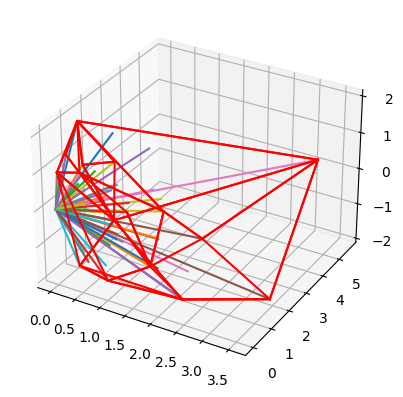

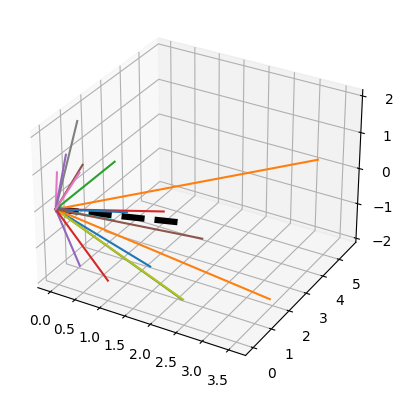

In [20]:
do_task_and_show(50)

Dots in convex hull: 19
2 [0.48138802 0.0253174  0.03565898]


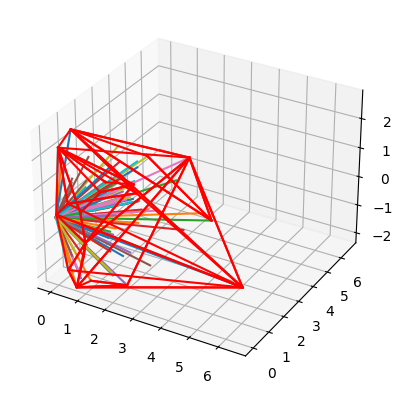

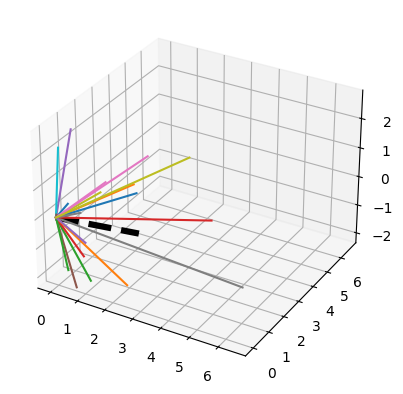

In [21]:
do_task_and_show(100)

Dots in convex hull: 42
11 [0.26225745 0.33634622 0.02601612]


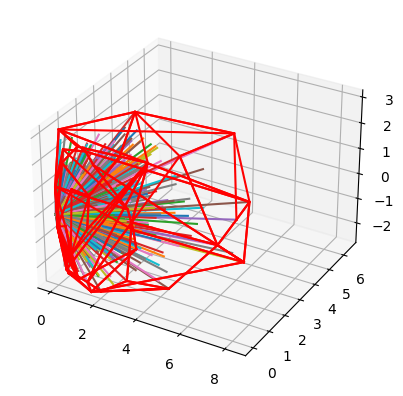

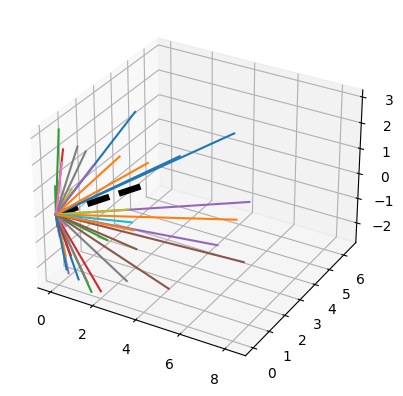

In [22]:
do_task_and_show(1000)

Dots in convex hull: 66
928 [0.02640446 0.01325508 0.00016768]


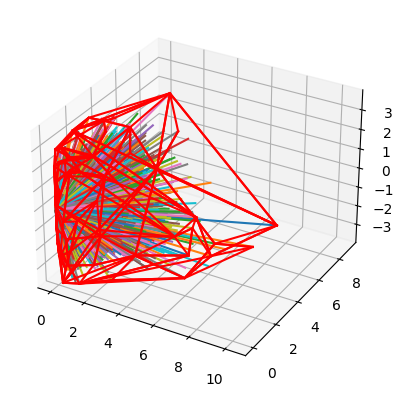

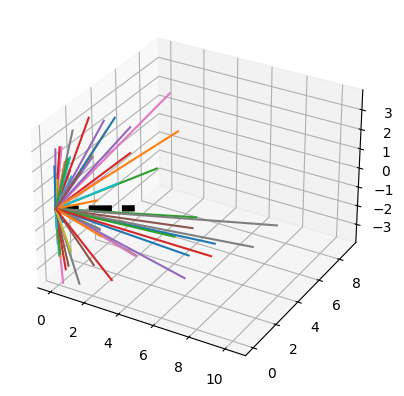

In [23]:
do_task_and_show(10000)